In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Create $n\times 2$-dimensional array $X$  by sampling from $2$-dimensional Gaussian distribution with zero mean and covariance matrix $\Sigma$: $N(0,\Sigma)$. 

Label the examples $X_i\in\mathbb R^2$ as follows: if $\|X_i\|_2>1$, then $y_i=1$ with probability $q$ and $y_i=0$ with probabilty $1-q$. Otherwise, $y_i=0$ with probability $q$ and $y_i=1$ with probabilty $1-q$.

(Take, e.g., $n=1000$, $q=0.9$)

Hint: use `np.random.multivariate_normal`, `np.random.choice`, `np.linalg.norm`.

In [2]:
mean=[0,0]
cov=[[1,0],[0,1]]
n=1000
q=0.9
# CODE HERE

array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737],
       ...,
       [ 0.86196115,  0.22402915],
       [ 0.0106053 ,  0.86851322],
       [-0.12185276,  0.75622156]])

Make the scatter plot for the components of $X$. Select different markers for the labels $0$ and $1$.

In [4]:
# CODE HERE

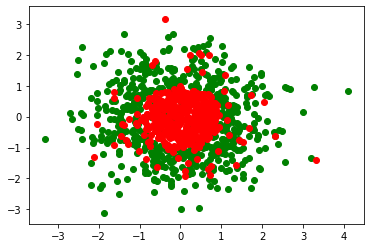

What is the proportion of examples, belonging to the positive class?

In [6]:
# CODE HERE

0.559

Make a train-test split, using `train_test_split` with `random_state=1`. 

In [8]:
# CODE HERE

Define the lists `training_accuracy`, `test_accuracy` (you can use arrays instead).

For the number of neighbors in $\{1,\dots,\max_n\}$ (e.g., $\max_n=200$)

1. Train the KNeighborsClassifier on the training set by using the `fit` method.
2. Make prediction for the training and validation sets and append the scores (accuracies) to the lists `training_accuracy`, `test_accuracy`.
3. Print the first 10 entries of these lists.

In [10]:
training_accuracy = []
test_accuracy = []
# CODE HERE

training_accuracy:
 [1.0, 0.896, 0.9026666666666666, 0.888, 0.8853333333333333, 0.884, 0.8893333333333333, 0.88, 0.88, 0.876]
test_accuracy:
 [0.84, 0.836, 0.868, 0.852, 0.88, 0.88, 0.888, 0.896, 0.9, 0.888]


Plot the graphs of the training and test accuracies against the number of neighbors (use `.xlabel`, `.ylabel`, `legend`). Do you see underfitting and overfitting?

In [12]:
# CODE HERE

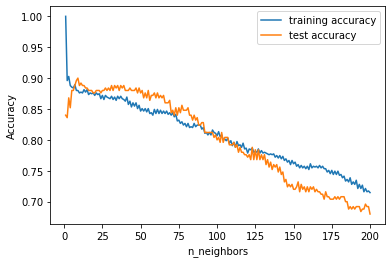

Print the maximal training and test accuracies.

In [14]:
# CODE HERE

maximal training accuracy 1.0 
maximal test accuracy 0.9


Find the best predictor and print its training and test scores (use `np.asarray(test_accuracy)` to convert list to array if needed). 

In [16]:
# CODE HERE

best number of neighbors 8 
training accuracy 0.88 
test accuracy 0.9


Plot the decision boundaries for the number of neighbors = 1, 3, 8, 200. The following code is due to Muller & Guido. However, you should import the module plots.plot_2d_separator from the module mglearn, created by Muller & Guido.

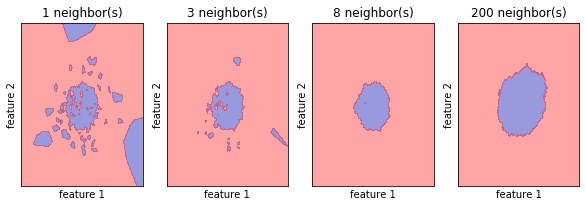

In [24]:
import sys
sys.path.append('C:\\Users\\rokhl\\ML_2020\\mglearn')
import mglearn
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 8, 200], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X_train, fill=True, ax=ax, alpha=.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

In [25]:
# Recall, how the meshgrid works
a=np.array([0,1,2])
b=np.array([0,2,4,6])
za,zb=np.meshgrid(a,b)
print('array of the first coordinates of all points of the grid:\n',za)
print('array of the second coordinates o all points of the grid:\n',zb)
# some function
def f(x,y):
    return x+y
# computing the function on the grid
f(za,zb)

array of the first coordinates of all points of the grid:
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
array of the second coordinates o all points of the grid:
 [[0 0 0]
 [2 2 2]
 [4 4 4]
 [6 6 6]]


array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

Using meshgrid and pcolormesh make plot the decision boundaries by yourself. Similar examples can be found in the `scikit-learn` documentation.

In [26]:
#CODE HERE

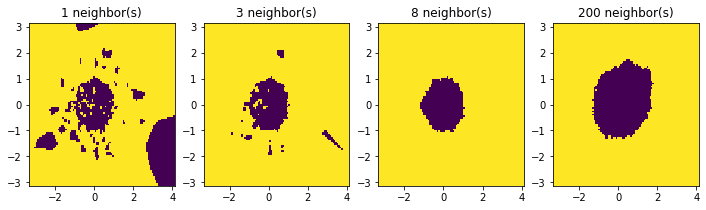

## Part 2.

Select the best number of neighbors by cross validation.

1. Import `GrigSearch` from `sklearn.model_selection`
2. Print possible hyperparameters for `KNeighborsClassifier()` by the method `.get_params().keys())`
3. Perform `GridSearchCV` with `cv=10` folds for the number of neighbors in $\{1,\dots,50\}$.
4. Print the best number of neighbors, and the scores of the respected KNN classifier.

In [ ]:
#CODE HERE

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
{'n_neighbors': 13}
train score: 0.8813333333333333
test score: 0.888


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For more information on the next exersize see *Albon 11.11*. 

Evaluate the effect of the number of observations in the training set on the learning process, using `learning_curve` from the module `sklearn.model_selection`. For 20 neighbors call it with `train_sizes=np.linspace(0.1, 1.0, 100)`
and fill the arrays `train_sizes`, `train_scores`, `validation_scores`.

In [30]:
from sklearn.model_selection import learning_curve

In [ ]:
#CODE HERE

Number of scores in each row of `train_scores`, `validation_scores` coincides with the number of folds in cross validation. So form the arrays of means `train_mean`, `validation_mean`.

In [1]:
#CODE HERE

In [33]:
print(train_sizes.shape,train_scores.shape,validation_scores.shape)

(100,) (100, 10) (100, 10)


Plot `train_mean`, `validation_mean` against `train_sizes`. 

In [ ]:
#CODE HERE

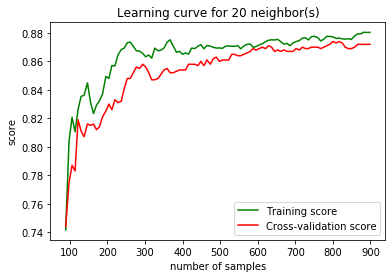

Tune the parameters of the SVC, using GridSearchfor for 10 folds and

`hyperparameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}`

Print the best parameter values and the scores of the respected SVC classifier.

In [ ]:
#CODE HERE

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters: {'C': 1, 'gamma': 1}
train score: 0.8866666666666667
test score: 0.9


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
